In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [13]:
df = pd.read_csv('monthyearcounts.csv')

In [14]:
df

,Unnamed: 0,Year,Month,value
0,0,1965,1,13
1,1,1965,2,54
2,2,1965,3,38
3,3,1965,4,33
4,4,1965,5,22
...,...,...,...,...
619,619,2016,8,35
620,620,2016,9,46
621,621,2016,10,36
622,622,2016,11,44


In [15]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [16]:
df

,Year,Month,value
0,1965,1,13
1,1965,2,54
2,1965,3,38
3,1965,4,33
4,1965,5,22
...,...,...,...
619,2016,8,35
620,2016,9,46
621,2016,10,36
622,2016,11,44


In [17]:
from datetime import datetime

In [18]:
df['MonthYear'] = None

In [19]:
for i in range(len(df['MonthYear'])):
    df.loc[i, 'MonthYear'] = datetime.strptime(str(df['Year'][i]) + '-' + str(df['Month'][i]), '%Y-%m')

In [20]:
df

,Year,Month,value,MonthYear
0,1965,1,13,1965-01-01 00:00:00
1,1965,2,54,1965-02-01 00:00:00
2,1965,3,38,1965-03-01 00:00:00
3,1965,4,33,1965-04-01 00:00:00
4,1965,5,22,1965-05-01 00:00:00
...,...,...,...,...
619,2016,8,35,2016-08-01 00:00:00
620,2016,9,46,2016-09-01 00:00:00
621,2016,10,36,2016-10-01 00:00:00
622,2016,11,44,2016-11-01 00:00:00


In [21]:
df['value'].mean()

36.90224358974359

In [22]:
df_train = df[df['Year'] != 2016]
df_test = df[df['Year'] == 2016]

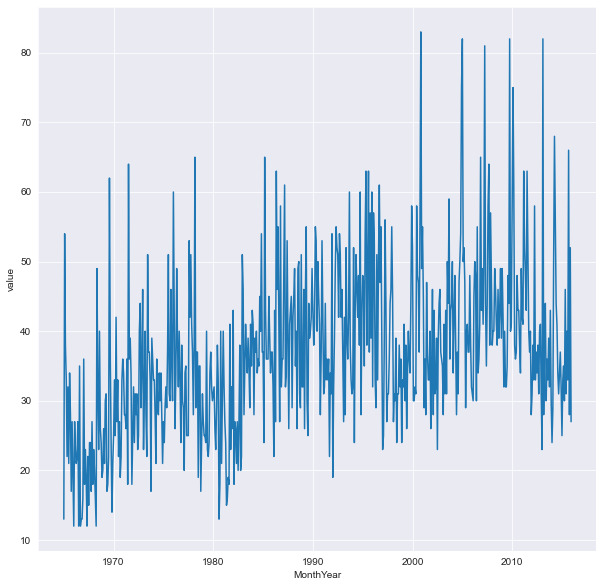

In [23]:
plt.figure(figsize = (10,10))
sns.set_style('darkgrid')
sns.lineplot(x = 'MonthYear', y = 'value', data = df_train)
plt.show()

Some increasing trends are appearing (as we know, earthquakes seem to be increasing) - so some differences need to be taken, looks either linear or quadratic - can't tell yet - we'll try both!

C:\Users\Taz\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


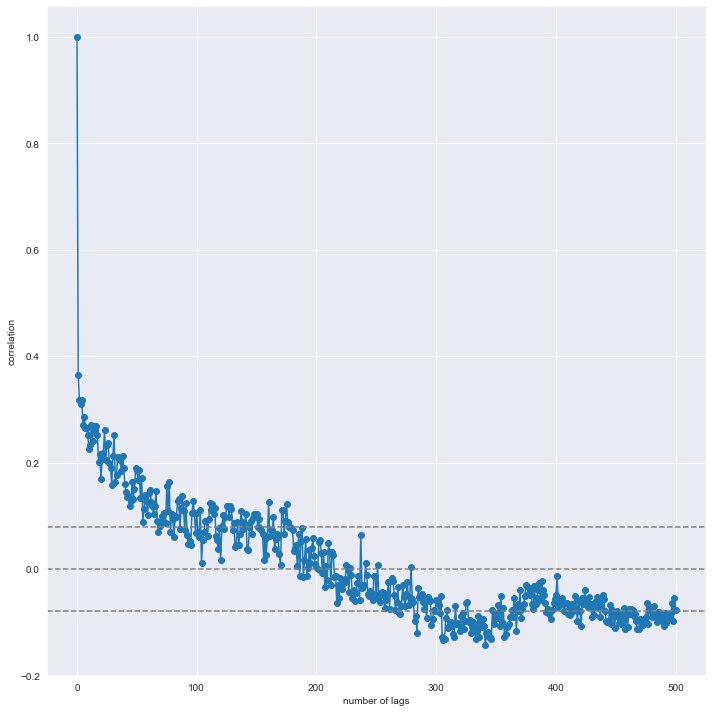

In [24]:
lag_acf = acf(df_train['value'], nlags=500)
plt.figure(figsize=(10, 10))
sns.set_style('darkgrid')
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

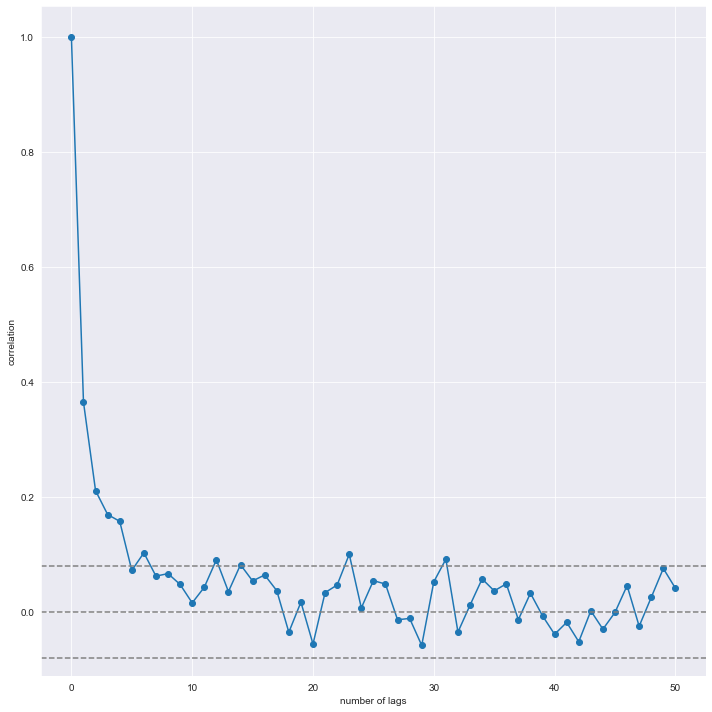

In [25]:
lag_pacf = pacf(df_train['value'], nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(10, 10))
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['value'])),linestyle='--',color='gray')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

its clear some differencing needs to be taken, with non-stationarity appearing in the time series plot and the ACF plot

Taking the first difference:

In [26]:
#df_train['first_diff'] = df_train['value'].diff()
#plt.figure(figsize = (10,10))
#plt.plot(df_train['first_diff'])
#plt.show()

<ipython-input-27-29ef3483ef37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['second_diff'] = df_train['value'].diff().diff()


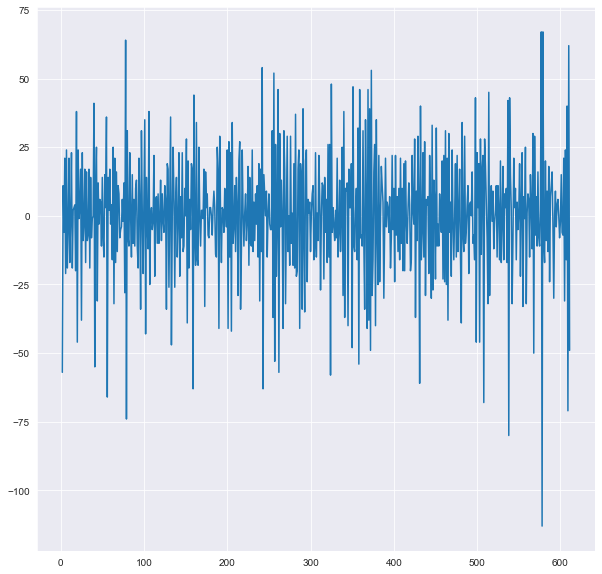

In [27]:
df_train['second_diff'] = df_train['value'].diff().diff()
plt.figure(figsize = (10,10))
sns.set_style('darkgrid')
plt.plot(df_train['second_diff'])
plt.show()

First different (at lag 1) looks a bit more suited!

Looking at ACF:

In [28]:
df_train.fillna(0, inplace = True)

C:\Users\Taz\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [29]:
#lag_acf = acf(df_train['first_diff'], nlags=500)
#plt.figure(figsize=(15, 15))
#Plot ACF: 
#plt.plot(lag_acf, marker="o")
#plt.axhline(y=0,linestyle='--',color='gray')
#plt.axhline(y=-1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
#plt.xlabel('number of lags')
#plt.ylabel('correlation')
#plt.tight_layout()

In [30]:
#lag_pacf = pacf(df_train['first_diff'], nlags=50, method='ols')

#PLOT PACF
#plt.figure(figsize=(16, 7))
#plt.plot(lag_pacf, marker="o")
#plt.axhline(y=0,linestyle='--',color='gray')
#plt.axhline(y=-1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
#plt.axhline(y=1.96/np.sqrt(len(df_train['first_diff'])),linestyle='--',color='gray')
#plt.title('Partial Autocorrelation Function')
#plt.xlabel('number of lags')
#plt.ylabel('correlation')
#plt.tight_layout()

The two spikes in the ACF combined with exponential decay in the PACF is a strong suggest of an MA(1) Model!

Let's fit this:

In [31]:
#model = ARIMA(df_train['value'], order=(0,1,1))

In [32]:
#model_fit = model.fit()

In [33]:
#print(model_fit.summary())

all features significant, passes Ljung Box, residuals skewed with kurtosis not equal to 3

In [34]:
import statsmodels.api as sm

In [35]:
#x = sm.stats.acorr_ljungbox(model_fit.resid, lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], return_df=True)

In [36]:
#x['lb_pvalue']

In [37]:
#plt.figure(figsize = (10,10))
#plt.scatter(x['lb_pvalue'].index, x['lb_pvalue'])
#plt.axhline(0.05)
#plt.xlabel('Lag')
#plt.ylabel('p-value')
#plt.title('p-values for Ljung-Box Statistic')
#plt.show()

In [38]:
#plt.figure(figsize = (10,10))
#residuals = pd.DataFrame(model_fit.resid)
#plt.plot(residuals)
#plt.show()

In [39]:
#residuals.plot(kind='kde', figsize = (10,10))
#plt.show()

C:\Users\Taz\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


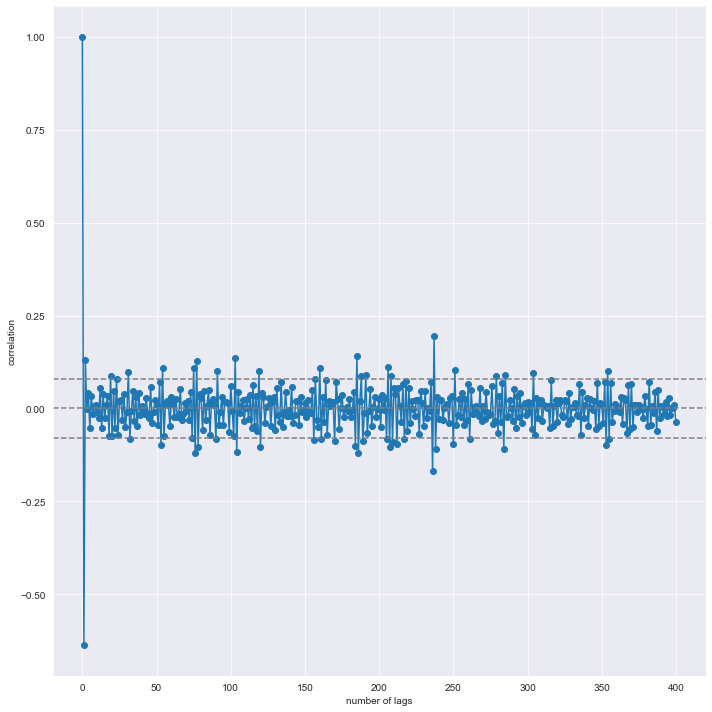

In [40]:
lag_acf = acf(df_train['second_diff'], nlags=400)
plt.figure(figsize=(10,10))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

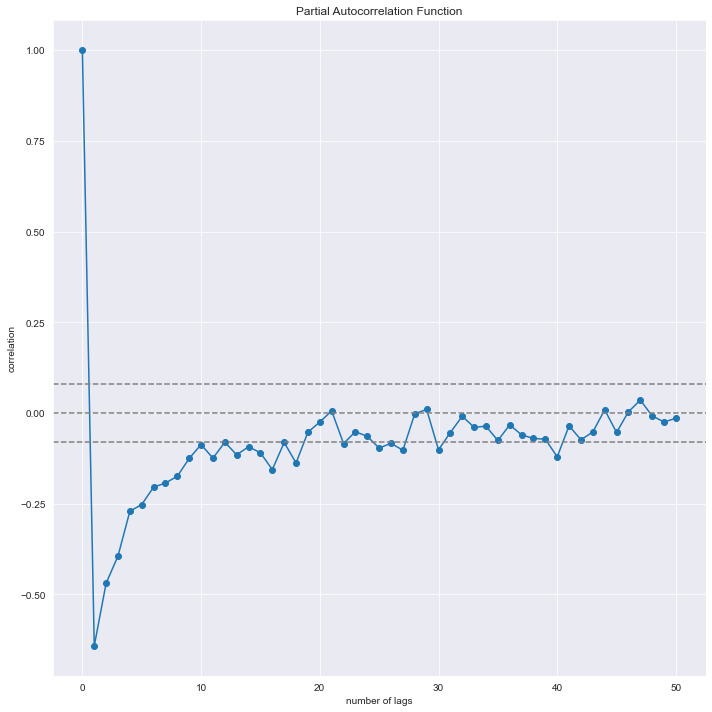

In [41]:
lag_pacf = pacf(df_train['second_diff'], nlags=50, method='ols')

#PLOT PACF
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_train['second_diff'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

MA(2) Model

In [42]:
model1 = ARIMA(df_train['value'], order=(0,2,2))

In [43]:
model_fit1 = model1.fit()

C:\Users\Taz\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [44]:
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  612
Model:                 ARIMA(0, 2, 2)   Log Likelihood               -2301.842
Date:                Sun, 09 Jan 2022   AIC                           4609.683
Time:                        03:39:27   BIC                           4622.923
Sample:                             0   HQIC                          4614.833
                                - 612                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9020      0.100    -19.091      0.000      -2.097      -1.707
ma.L2          0.9021      0.089     10.150      0.000       0.728       1.076
sigma2       108.7107     14.137      7.690      0.0

In [45]:
y = sm.stats.acorr_ljungbox(model_fit1.resid, lags = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], return_df=True)

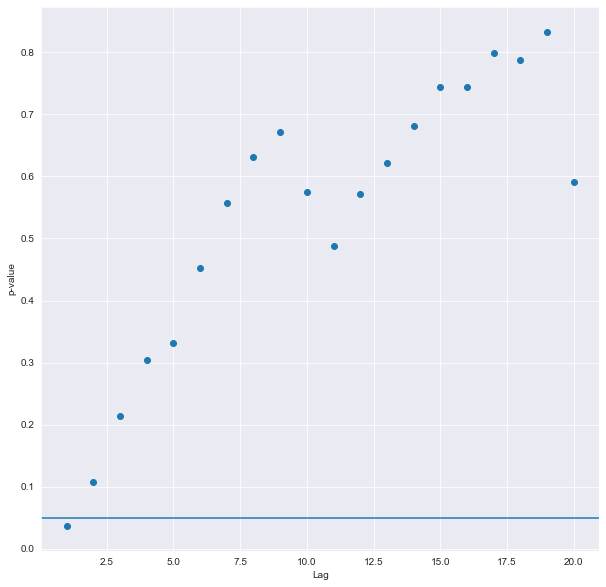

In [46]:
plt.figure(figsize = (10,10))
plt.scatter(y['lb_pvalue'].index, y['lb_pvalue'])
plt.axhline(0.05)
plt.xlabel('Lag')
plt.ylabel('p-value')
plt.show()

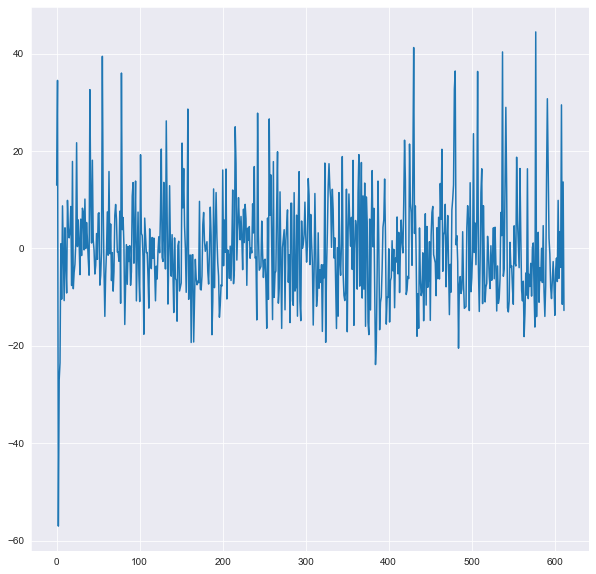

In [47]:
plt.figure(figsize = (10,10))
residuals1 = pd.DataFrame(model_fit1.resid)
plt.plot(residuals1)
plt.show()

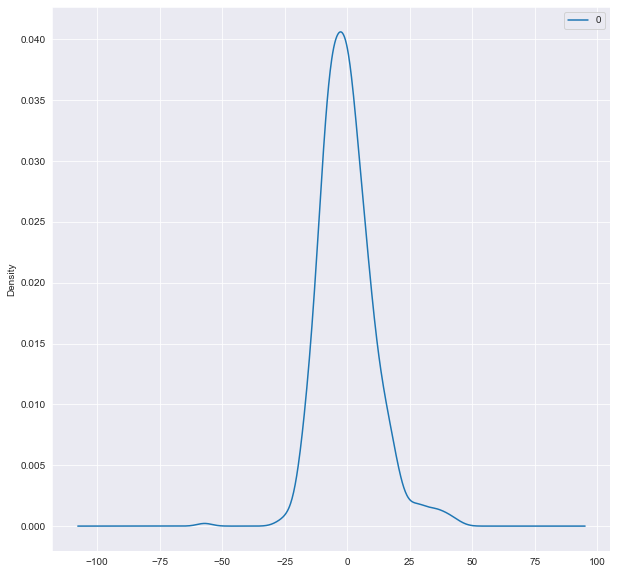

In [48]:
residuals1.plot(kind='kde', figsize = (10,10))
plt.show()

Second difference has better residuals, seems to have passed the ljung box test but not the Jarque-Bera one. Heavier tails and skew compared to a normal dist. - not completely gaussian residuals. Second different model is taken.

In [49]:
# Predictions
yhat = model_fit1.predict(len(df_train), len(df_train)+11)
print(yhat)

612    38.477670
613    38.496532
614    38.515393
615    38.534255
616    38.553116
617    38.571978
618    38.590840
619    38.609701
620    38.628563
621    38.647425
622    38.666286
623    38.685148
Name: predicted_mean, dtype: float64


In [50]:
pred_my = df[df['Year'] == 2016]['MonthYear'].reset_index().drop('index', axis = 1)

In [63]:
pred_my

,MonthYear
0,2016-01-01 00:00:00
1,2016-02-01 00:00:00
2,2016-03-01 00:00:00
3,2016-04-01 00:00:00
4,2016-05-01 00:00:00
5,2016-06-01 00:00:00
6,2016-07-01 00:00:00
7,2016-08-01 00:00:00
8,2016-09-01 00:00:00
9,2016-10-01 00:00:00


In [51]:
predictions = pd.Series(yhat).reset_index()

In [52]:
predictions.drop('index', axis = 1, inplace = True)

In [53]:
predictions

,predicted_mean
0,38.477670
1,38.496532
2,38.515393
3,38.534255
4,38.553116
5,38.571978
6,38.590840
7,38.609701
8,38.628563
9,38.647425


In [54]:
combined_pred = pd.concat([pred_my, predictions], axis = 1)

In [64]:
combined_pred

,MonthYear,predicted_mean,lower value,upper value
0,2016-01-01 00:00:00,38.477670,18.028895,58.926445
1,2016-02-01 00:00:00,38.496532,17.947283,59.045780
2,2016-03-01 00:00:00,38.515393,17.865828,59.164958
3,2016-04-01 00:00:00,38.534255,17.784529,59.283981
4,2016-05-01 00:00:00,38.553116,17.703382,59.402851
5,2016-06-01 00:00:00,38.571978,17.622385,59.521571
6,2016-07-01 00:00:00,38.590840,17.541536,59.640143
7,2016-08-01 00:00:00,38.609701,17.460834,59.758569
8,2016-09-01 00:00:00,38.628563,17.380276,59.876850
9,2016-10-01 00:00:00,38.647425,17.299860,59.994990


In [55]:
overall_extract_2012 = df[564:613]

In [56]:
true_2016 = df[df['Year'] == 2016]

In [57]:
forecasts = model_fit1.get_forecast(12)

In [69]:
forecasts.predicted_mean

612    38.477670
613    38.496532
614    38.515393
615    38.534255
616    38.553116
617    38.571978
618    38.590840
619    38.609701
620    38.628563
621    38.647425
622    38.666286
623    38.685148
Name: predicted_mean, dtype: float64

In [58]:
ci_s = forecasts.conf_int(alpha=0.05)

In [59]:
ci_s = ci_s.reset_index().drop('index', axis = 1)

In [60]:
combined_pred = pd.concat([combined_pred, ci_s], axis = 1)

In [61]:
combined_pred

,MonthYear,predicted_mean,lower value,upper value
0,2016-01-01 00:00:00,38.477670,18.028895,58.926445
1,2016-02-01 00:00:00,38.496532,17.947283,59.045780
2,2016-03-01 00:00:00,38.515393,17.865828,59.164958
3,2016-04-01 00:00:00,38.534255,17.784529,59.283981
4,2016-05-01 00:00:00,38.553116,17.703382,59.402851
5,2016-06-01 00:00:00,38.571978,17.622385,59.521571
6,2016-07-01 00:00:00,38.590840,17.541536,59.640143
7,2016-08-01 00:00:00,38.609701,17.460834,59.758569
8,2016-09-01 00:00:00,38.628563,17.380276,59.876850
9,2016-10-01 00:00:00,38.647425,17.299860,59.994990


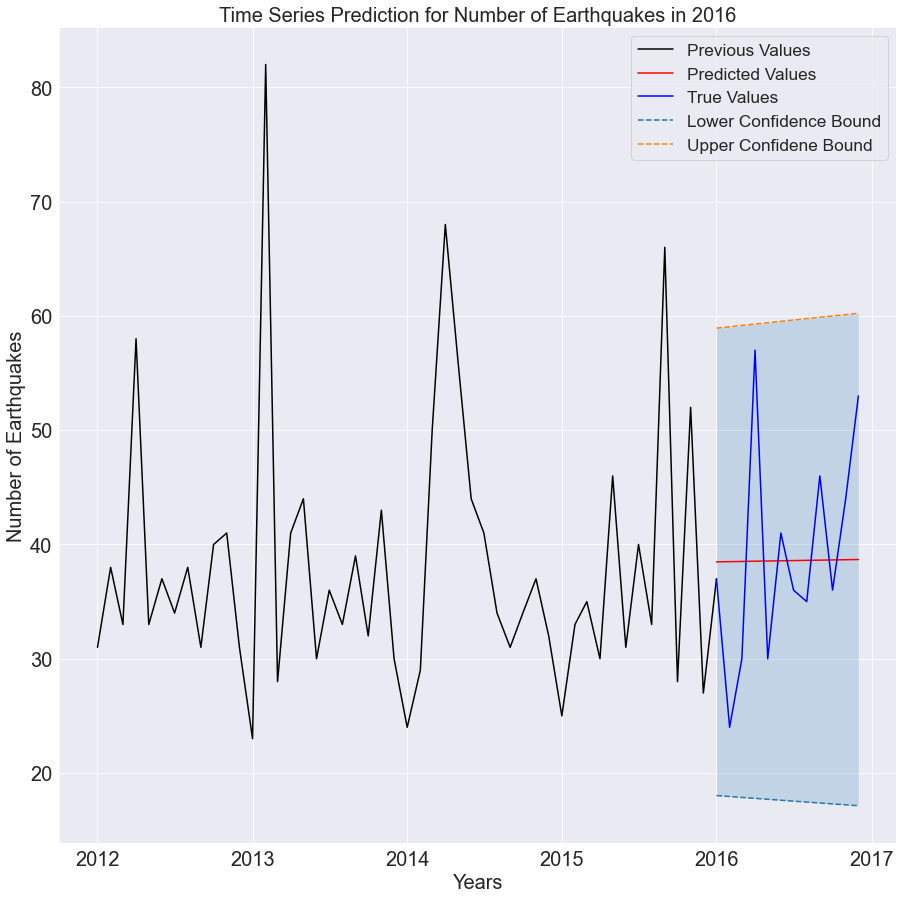

In [62]:
sns.set_style('darkgrid')

#Creating Figure
fig, ax = plt.subplots(figsize = (15,15))

#Lines
sns.lineplot(x = 'MonthYear', y = 'value', data = overall_extract_2012, color = 'k', ax=ax)
sns.lineplot(x = 'MonthYear', y = 'predicted_mean', data = combined_pred, color = 'r', ax=ax)
sns.lineplot(x = 'MonthYear', y = 'value', data = true_2016, color = 'b', ax=ax)

# Confidence Bounds
ax.plot(combined_pred['MonthYear'], combined_pred['lower value'], '--')
ax.plot(combined_pred['MonthYear'], combined_pred['upper value'], '--')
ax.fill_between(combined_pred['MonthYear'], combined_pred['lower value'], 
               combined_pred['upper value'], alpha = 0.2)

for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)
    
ax.set_title('Time Series Prediction for Number of Earthquakes in 2016', fontsize = 20)

#Plot Features
plt.legend(['Previous Values', 'Predicted Values', 'True Values', 'Lower Confidence Bound',
           'Upper Confidene Bound'], fontsize = 'xx-large')
#plt.title('Time Series Prediction for Number of Earthquakes in 2016')
plt.xlabel('Years')
plt.ylabel('Number of Earthquakes')

plt.show()